In [1]:
import os 
os.getcwd()

'C:\\Users\\PC\\Desktop\\datasciencepw'

In [2]:
import pandas as pd
import tensorflow as tf
import  numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
housing=fetch_california_housing()

In [6]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [7]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [8]:
X=pd.DataFrame(housing.data,columns=housing.feature_names)

In [9]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
y=pd.DataFrame(housing.target,columns=['target'])

In [11]:
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [14]:
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [15]:
X_train.shape

(11610, 8)

In [16]:
X_train_full.shape

(15480, 8)

In [17]:
X_train.shape[1]

8

In [18]:
X_train.shape[1:]

(8,)

In [24]:
Layers=[tf.keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
        tf.keras.layers.Dense(10,activation='relu'),
         tf.keras.layers.Dense(5,activation='relu'),
         tf.keras.layers.Dense(1) ]

In [25]:
model=tf.keras.models.Sequential(Layers)

In [27]:
Loss='mse'
Optimizer='sgd'
model.compile(loss=Loss,optimizer=Optimizer)

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                270       
                                                                 
 dense_9 (Dense)             (None, 10)                310       
                                                                 
 dense_10 (Dense)            (None, 5)                 55        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [29]:
scaler=StandardScaler()

In [30]:
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [31]:
epochs=25
history=model.fit(X_train,y_train,epochs=epochs,validation_data=(X_valid,y_valid))

Epoch 1/25
363/363 [==============================] - 1s 2ms/step - loss: 0.6603 - val_loss: 0.4502
Epoch 2/25
363/363 [==============================] - 0s 1ms/step - loss: 0.4368 - val_loss: 0.3929
Epoch 3/25
363/363 [==============================] - 0s 1ms/step - loss: 0.3974 - val_loss: 0.3938
Epoch 4/25
363/363 [==============================] - 0s 1ms/step - loss: 0.3790 - val_loss: 0.3670
Epoch 5/25
363/363 [==============================] - 0s 1ms/step - loss: 0.3683 - val_loss: 0.3580
Epoch 6/25
363/363 [==============================] - 1s 1ms/step - loss: 0.3593 - val_loss: 0.3560
Epoch 7/25
363/363 [==============================] - 0s 1ms/step - loss: 0.3546 - val_loss: 0.3573
Epoch 8/25
363/363 [==============================] - 0s 1ms/step - loss: 0.3489 - val_loss: 0.3471
Epoch 9/25
363/363 [==============================] - 0s 1ms/step - loss: 0.3451 - val_loss: 0.3462
Epoch 10/25
363/363 [==============================] - 0s 1ms/step - loss: 0.3400 - val_loss: 0.3566

In [32]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.660290,0.450189
1,0.436849,0.392865
2,0.397410,0.393767
3,0.378987,0.367040
4,0.368307,0.358028
5,0.359342,0.355967
6,0.354610,0.357335
7,0.348867,0.347071
8,0.345097,0.346156
9,0.339973,0.356607


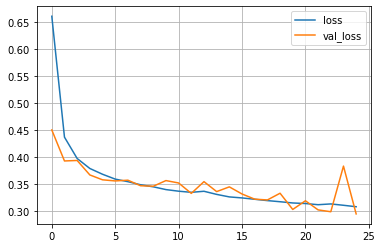

In [43]:
pd.DataFrame(history.history).plot()
plt.grid()

In [34]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 851us/step - loss: 0.3083


0.30833736062049866

In [35]:
X_test.shape

(5160, 8)

In [36]:
new=X_test[0]

In [38]:
new

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735,  0.19374821,  0.2870474 ])

In [39]:
new.reshape((1,8)).shape

(1, 8)

In [40]:
model.predict(new.reshape((1,8)))

1/1 [==============================] - 0s 60ms/step


array([[0.7338894]], dtype=float32)

In [41]:
#model-2
model_2=tf.keras.models.Sequential(Layers)

In [42]:
Loss='mse'
optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3)
model_2.compile(loss=Loss,optimizer=optimizer)

In [45]:
epochs=20
checkpoint_cb=tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)
eraly=tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
tensorboard=tf.keras.callbacks.TensorBoard(log_dir='logs')
callbacks=[checkpoint_cb,eraly,tensorboard]
history=model_2.fit(X_train,y_train,epochs=epochs,validation_data=(X_valid,y_valid),callbacks=callbacks)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2973 - val_loss: 0.2900
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2971 - val_loss: 0.2904
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.2967 - val_loss: 0.2895
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.2963 - val_loss: 0.2891
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2958 - val_loss: 0.2904
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.2959 - val_loss: 0.2893
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.2955 - val_loss: 0.2890
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2953 - val_loss: 0.2890
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2952 - val_loss: 0.2889
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2948 - val_loss: 0.2887

In [46]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.297309,0.289992
1,0.297053,0.290419
2,0.296715,0.289477
3,0.296349,0.289060
4,0.295828,0.290433
5,0.295939,0.289338
6,0.295542,0.288980
7,0.295290,0.288982
8,0.295216,0.288889
9,0.294805,0.288689


<AxesSubplot:>

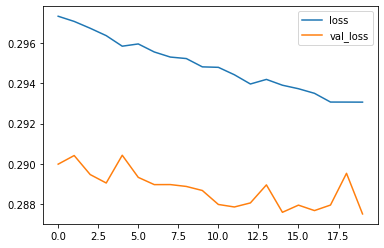

In [47]:
pd.DataFrame(history.history).plot()

In [48]:
%load_ext tensorboard

In [49]:
%tensorboard --logdir='logs'